**Roll no - 31404 Practical 8 DSBDAL K4**
**Problem Statement - Data Analytics I
Create a Linear Regression Model using Python/R to predict home
prices using Boston Housing Dataset.
(https://www.kaggle.com/c/boston-housing).
The Boston Housing dataset contains information about various
houses in Boston through different parameters. There are 506 samples
and 14 feature variables in this dataset.**

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
column_names = ['Crime_rate','zn','indus','chas','nox','rm','Age','Distance','rad','tax','ptratio','b','lstat','medv']
data = pd.read_csv('bostonhousing.csv',names=column_names)

In [30]:
#information about the dataset
print(data.head())
print(data.describe()) #statistics
print(data.isnull().sum())  #missing values

   Crime_rate  zn  indus  chas    nox     rm   Age  Distance  rad  tax  \
0  Crime_rate  zn  indus  chas    nox     rm   Age  Distance  rad  tax   
1     0.00632  18   2.31     0  0.538  6.575  65.2      4.09    1  296   
2     0.02731   0   7.07     0  0.469  6.421  78.9    4.9671    2  242   
3     0.02729   0   7.07     0  0.469  7.185  61.1    4.9671    2  242   
4     0.03237   0   2.18     0  0.458  6.998  45.8    6.0622    3  222   

   ptratio       b  lstat  medv  
0  ptratio       b  lstat  medv  
1     15.3   396.9   4.98    24  
2     17.8   396.9   9.14  21.6  
3     17.8  392.83   4.03  34.7  
4     18.7  394.63   2.94  33.4  
       Crime_rate   zn indus chas    nox     rm  Age Distance  rad  tax  \
count         507  507   507  507    507    502  507      507  507  507   
unique        505   27    77    3     82    442  357      413   10   67   
top       0.01501    0  18.1    0  0.538  6.405  100   3.4952   24  666   
freq            2  372   132  471     23      3   4

In [31]:
#convert non-numeric columns to numeric
data = data.apply(pd.to_numeric, errors='coerce')

In [32]:
#handle missing values
data = data.dropna()

In [39]:
#select feature(RM-avg number of rooms) and target variable(MEDV-house price)
x = data[['rm']]
y = data['medv']

In [56]:
#split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)

In [57]:
#create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

Intercept: -34.958388531031446
Coefficient: [9.13905943]


In [58]:
#making predictions
y_pred = model.predict(X_test)
y_pred

array([18.24921545, 24.01596195,  7.3371785 , 14.30114178, 19.7023259 ,
       16.65901911, 23.72351205, 23.58642616, 25.16748344, 20.90868175,
       22.08762041, 20.25066947, 37.50521367, 19.34590258, 28.72257756,
       36.81064515, 20.15927887, 15.93703342, 20.21411323, 21.19199259,
       17.67345471, 23.9154323 , 18.55994347, 15.63544446, 16.1655099 ,
       20.05874922, 17.38100481, 19.29106823, 29.57251008, 19.55610095,
       21.40219095, 25.74324418,  9.87783702, 31.51912974, 41.23394991,
       28.78655097, 36.00640792, 17.88365308, 14.50220109, 25.05781473,
       27.90920127, 16.2112052 , 14.88604158, 20.98179422, 27.33344052,
       26.52920329, 22.16987195, 20.46086783, 16.47623792, 17.65517659,
       12.15346281])

In [59]:
#evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Value: {r2}")

Mean Squared Error: 31.517708191149183
R-squared Value: 0.5842378601235769


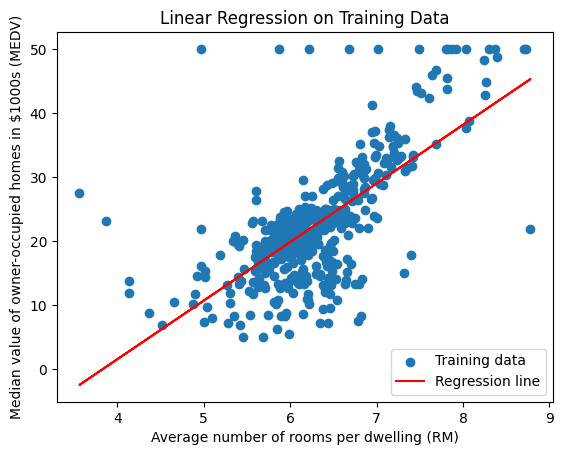

In [69]:
#plot regression line on the training data
plt.scatter(X_train, y_train, label='Training data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression line')
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Median value of owner-occupied homes in $1000s (MEDV)')
plt.title('Linear Regression on Training Data')
plt.legend()
plt.show()

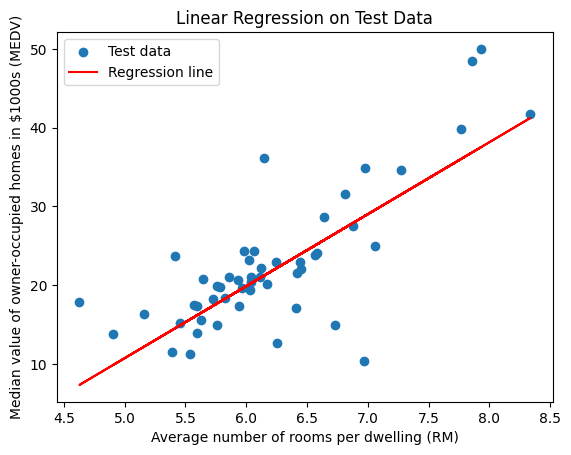

In [67]:
#plot the regression line on the test data
plt.scatter(X_test, y_test, label='Test data')
plt.plot(X_test, y_pred, color='red', label='Regression line')
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Median value of owner-occupied homes in $1000s (MEDV)')
plt.title('Linear Regression on Test Data')
plt.legend()
plt.show()